<a href="https://colab.research.google.com/github/vfunnny2000/AI_hw/blob/main/AI_HW_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## По адресу https://goo.gl/STWRi3 расположен временной ряд за несколько лет.
- ### Используйте любой инструмент для дата майнинга (можно даже ту же самую электронную таблицу).
- ### Найдите закономерности в представленном временном ряду, если они есть.
- ### Сделайте прогноз по тренду.

***
=>>> *Так как тема не изучена в достаточном объеме (продолжу изучение), то пойдем step-by-step, но по правилам "хорошего кода" все должно выглядеть несколько иначе, как я понимаю-)*

In [4]:
import pandas as pd

# Загрузка данных из файла Excel
data = pd.read_excel('/HW_6_data.xlsx')

# Преобразование столбца 'Date' в формат даты
data['Date'] = pd.to_datetime(data['Date'])

# Установка столбца 'Date' в качестве индекса
data.set_index('Date', inplace=True)

# Вывод первых нескольких строк данных
print(data.head())

# Описательная статистика данных
print(data.describe())

            Value
Date             
2014-05-01      0
2014-05-02     10
2014-05-03      0
2014-05-04      0
2014-05-05      0
             Value
count  1461.000000
mean      2.619439
std       2.624230
min       0.000000
25%       1.000000
50%       1.000000
75%       4.000000
max      10.000000


Поиск различных закономерностей во временном ряду:

- Визуализация временного ряда:

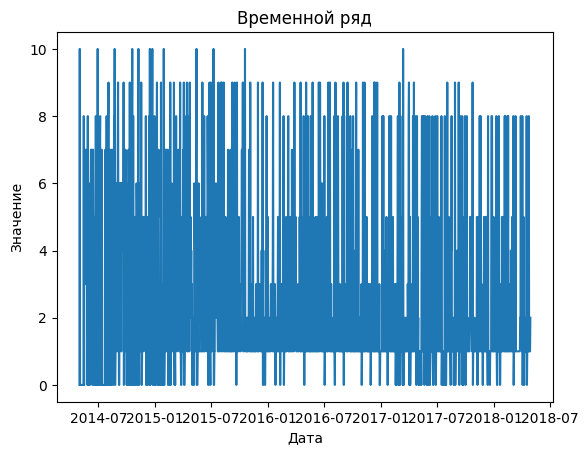

In [5]:
import matplotlib.pyplot as plt

# Визуализация временного ряда
plt.plot(data['Value'])
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.title('Временной ряд')
plt.show()


- Автокорреляционная функция (ACF) и частная автокорреляционная функция (PACF):

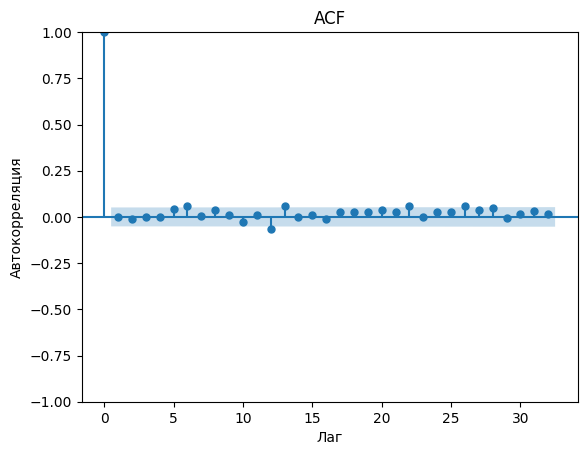

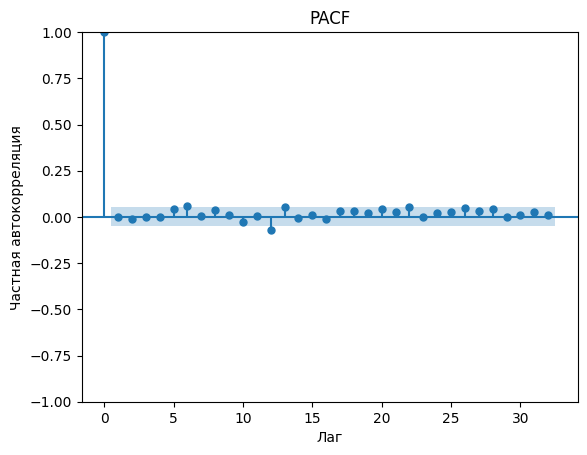

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Автокорреляционная функция (ACF)
plot_acf(data['Value'])
plt.xlabel('Лаг')
plt.ylabel('Автокорреляция')
plt.title('ACF')
plt.show()

# Частная автокорреляционная функция (PACF)
plot_pacf(data['Value'])
plt.xlabel('Лаг')
plt.ylabel('Частная автокорреляция')
plt.title('PACF')
plt.show()

- Декомпозиция временного ряда на тренд, сезонность и остатки:

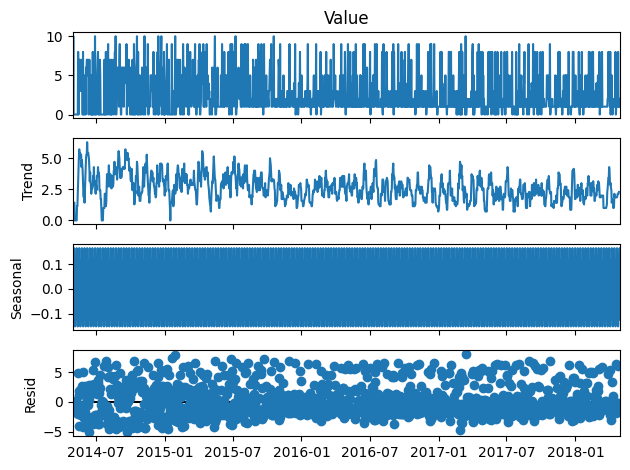

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Декомпозиция временного ряда на тренд, сезонность и остатки
decomposition = seasonal_decompose(data['Value'], model='additive')
fig = decomposition.plot()
plt.show()

Для прогнозирования тренда воспользуемся моделью скользящего среднего (MA).

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


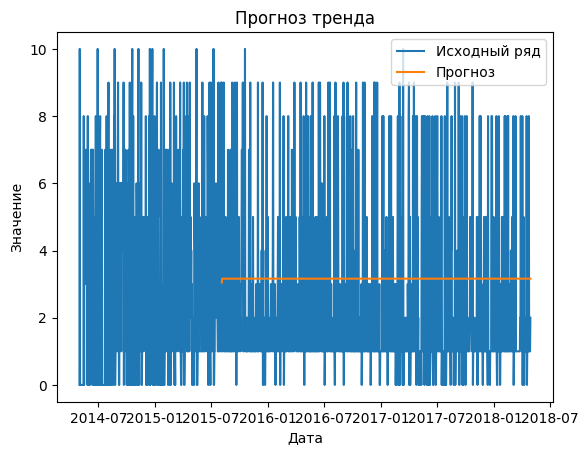

In [8]:
from statsmodels.tsa.arima.model import ARIMA

# Разбиение данных на тренировочную и тестовую выборки
train_data = data['Value'].iloc[:-1000]
test_data = data['Value'].iloc[-1000:]

# Моделирование временного ряда с использованием MA модели
model = ARIMA(train_data, order=(0, 0, 1))
model_fit = model.fit()

# Прогнозирование тренда
forecast = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

# Визуализация прогноза
plt.plot(data.index, data['Value'], label='Исходный ряд')
plt.plot(forecast.index, forecast, label='Прогноз')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.title('Прогноз тренда')
plt.legend()
plt.show()
